In [26]:
import pandas as pd

In [27]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [28]:
train

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
...,...,...,...
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression


In [29]:
train.shape, test.shape

((616, 3), (309, 2))

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [31]:
train.label.value_counts()

Depression    352
Alcohol       140
Suicide        66
Drugs          58
Name: label, dtype: int64

# data preparation

## Features extraction
Bag-of-words: transform each comment to words counter vector

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

#initialize the vectorizer
bag_of_words = CountVectorizer(stop_words='english', analyzer='word')

In [33]:
Depression = train[train.label == "Depression"]
Alcohol = train[train.label == "Alcohol"]
Suicide = train[train.label == "Suicide"]
Drugs = train[train.label == "Drugs"]
Depression = Depression.sample(n=200)
Alcohol = Alcohol.sample(n=100)
#combine the data
data = pd.concat([Depression, Alcohol, Suicide, Drugs], axis=0)
data = data.sample(frac=1, random_state= 1)
data = data.reset_index(drop=True)
data


,ID,text,label
0,C7QD5SLH,How do i get better?,Depression
1,124Y7IO6,Financial issues,Depression
2,9XHFLZW0,I feel abandoned and lonely,Depression
3,50NFWPFO,why do we use bhang?,Drugs
4,N5NIMS0Z,Hopeless,Depression
...,...,...,...
419,IKLQJKBL,what should I do to stop alcoholism?,Alcohol
420,0HK6V5IQ,I am bored,Depression
421,6XVOCUMI,How can i stop bhang?,Drugs
422,9DOVTEWF,How to stop taking alcohol,Alcohol


In [34]:
train_words = bag_of_words.fit_transform(train['text'])
test_words = bag_of_words.transform(test['text'])

In [35]:
bag_of_words.vocabulary_

{'feel': 239,
 'better': 61,
 'dieam': 161,
 'happy': 289,
 'hallucinations': 283,
 'stresseed': 588,
 'lack': 360,
 'financial': 249,
 'support': 601,
 'school': 542,
 'life': 367,
 'important': 329,
 'helped': 309,
 'depression': 150,
 'effects': 197,
 'ones': 451,
 'health': 301,
 'hard': 290,
 'deal': 138,
 'emotionally': 200,
 'overwhelmed': 458,
 'manage': 405,
 'taking': 608,
 'alcohol': 21,
 'heaven': 306,
 'open': 452,
 'smoke': 561,
 'bhang': 62,
 'survive': 605,
 'money': 429,
 'stop': 583,
 'unbearable': 629,
 'sad': 537,
 'drugsnow': 191,
 'know': 359,
 'cope': 123,
 'negative': 436,
 'aspects': 36,
 'absent': 2,
 'minded': 423,
 'experienced': 221,
 'studies': 593,
 'like': 369,
 'world': 675,
 'low': 394,
 'place': 477,
 'using': 648,
 'hopeless': 316,
 'unworthy': 642,
 'useless': 647,
 'stress': 586,
 'frorge': 261,
 'past': 465,
 'does': 177,
 'mediataton': 414,
 'help': 308,
 'weed': 664,
 'addiction': 10,
 'bad': 47,
 'difficulties': 163,
 'control': 120,
 'smoking'

# Training

#### Build a sentiment classifier
Train the sentiment classifier using SVM


In [36]:
x, x_test=train_words, test_words
y=train['label']

In [37]:
print('train  shape :', x.shape)
print('label  shape :', len(y))

train  shape : (616, 683)
label  shape : 616


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC()

In [40]:
svclassifier.classes_

array(['Alcohol', 'Depression', 'Drugs', 'Suicide'], dtype=object)

In [41]:
y_pred = svclassifier.predict(X_val)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True')]

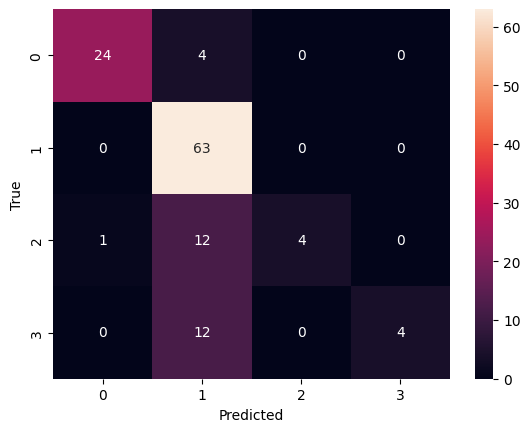

In [43]:
cm = confusion_matrix(y_val, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
ax.set(xlabel='Predicted', ylabel='True')

In [44]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

     Alcohol       0.96      0.86      0.91        28
  Depression       0.69      1.00      0.82        63
       Drugs       1.00      0.24      0.38        17
     Suicide       1.00      0.25      0.40        16

    accuracy                           0.77       124
   macro avg       0.91      0.59      0.63       124
weighted avg       0.83      0.77      0.72       124



In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.7661290322580645

## Submission

In [46]:
sub = pd.read_csv('./SampleSubmission.csv')
sub

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0,0,0,0
1,03BMGTOK,0,0,0,0
2,03LZVFM6,0,0,0,0
3,0EPULUM5,0,0,0,0
4,0GM4C5GD,0,0,0,0
...,...,...,...,...,...
304,Z9A6ACLK,0,0,0,0
305,ZDUOIGKN,0,0,0,0
306,ZHQ60CCH,0,0,0,0
307,ZVIJMA4O,0,0,0,0


In [47]:
my_sub = pd.DataFrame()

In [48]:
# get the probability of each class between 0 and 1
model = SVC(probability=True)
model.fit(x, y)
pred = model.predict_proba(x_test)
classes = model.classes_
my_sub['ID'] = sub['ID']
my_sub[classes] = pred
columns = ['ID', 'Depression', 'Alcohol', 'Suicide', 'Drugs']
my_sub = my_sub[columns]
my_sub

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0.446136,0.307416,0.195930,0.050519
1,03BMGTOK,0.947262,0.005040,0.043826,0.003872
2,03LZVFM6,0.966906,0.006426,0.019395,0.007274
3,0EPULUM5,0.905931,0.010992,0.071702,0.011375
4,0GM4C5GD,0.058622,0.173478,0.079380,0.688520
...,...,...,...,...,...
304,Z9A6ACLK,0.789379,0.072111,0.126306,0.012204
305,ZDUOIGKN,0.565439,0.055955,0.355106,0.023500
306,ZHQ60CCH,0.549102,0.253112,0.170173,0.027613
307,ZVIJMA4O,0.001768,0.004400,0.010283,0.983549


In [49]:
my_sub.to_csv('submission.csv', index=False)